https://programmers.co.kr/learn/courses/30/lessons/42627

## 문제 설명
하드디스크는 한 번에 하나의 작업만 수행할 수 있습니다. 디스크 컨트롤러를 구현하는 방법은 여러 가지가 있습니다. 가장 일반적인 방법은 요청이 들어온 순서대로 처리하는 것입니다.

예를들어
- 0ms 시점에 3ms가 소요되는 A작업 요청
- 1ms 시점에 9ms가 소요되는 B작업 요청
- 2ms 시점에 6ms가 소요되는 C작업 요청

와 같은 요청이 들어왔습니다. 이를 그림으로 표현하면 아래와 같습니다.
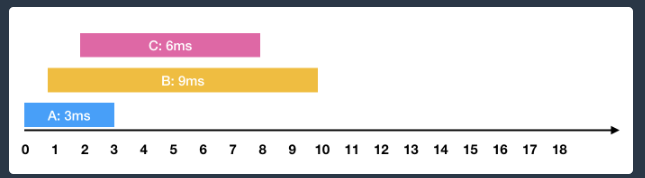
한 번에 하나의 요청만을 수행할 수 있기 때문에 각각의 작업을 요청받은 순서대로 처리하면 다음과 같이 처리 됩니다.
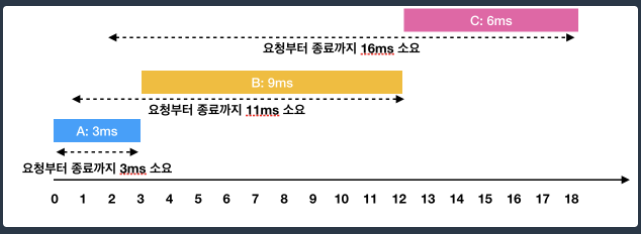
- A: 3ms 시점에 작업 완료 (요청에서 종료까지 : 3ms)
- B: 1ms부터 대기하다가, 3ms 시점에 작업을 시작해서 12ms 시점에 작업 완료(요청에서 종료까지 : 11ms)
- C: 2ms부터 대기하다가, 12ms 시점에 작업을 시작해서 18ms 시점에 작업 완료(요청에서 종료까지 : 16ms)

이 때 각 작업의 요청부터 종료까지 걸린 시간의 평균은 10ms(= (3 + 11 + 16) / 3)가 됩니다.

하지만 A → C → B 순서대로 처리하면

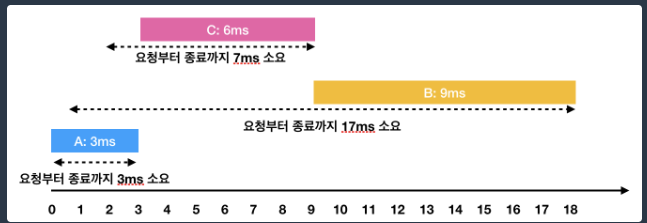
- A: 3ms 시점에 작업 완료(요청에서 종료까지 : 3ms)
- C: 2ms부터 대기하다가, 3ms 시점에 작업을 시작해서 9ms 시점에 작업 완료(요청에서 종료까지 : 7ms)
- B: 1ms부터 대기하다가, 9ms 시점에 작업을 시작해서 18ms 시점에 작업 완료(요청에서 종료까지 : 17ms)

이렇게 A → C → B의 순서로 처리하면 각 작업의 요청부터 종료까지 걸린 시간의 평균은 9ms(= (3 + 7 + 17) / 3)가 됩니다.

각 작업에 대해 [작업이 요청되는 시점, 작업의 소요시간]을 담은 2차원 배열 jobs가 매개변수로 주어질 때, 작업의 요청부터 종료까지 걸린 시간의 평균을 가장 줄이는 방법으로 처리하면 평균이 얼마가 되는지 return 하도록 solution 함수를 작성해주세요. (단, 소수점 이하의 수는 버립니다)

## 제한 사항
- jobs의 길이는 1 이상 500 이하입니다.
- jobs의 각 행은 하나의 작업에 대한 [작업이 요청되는 시점, 작업의 소요시간] 입니다.
- 각 작업에 대해 작업이 요청되는 시간은 0 이상 1,000 이하입니다.
- 각 작업에 대해 작업의 소요시간은 1 이상 1,000 이하입니다.
- 하드디스크가 작업을 수행하고 있지 않을 때에는 먼저 요청이 들어온 작업부터 처리합니다.

In [73]:
jobs = [[0, 7], [1, 9], [2, 6]]
# 9

In [67]:
L = len(jobs)
L

3

In [68]:
jobs = deque(sorted(jobs)) # 요청 시점 기준으로 정렬
jobs

deque([[0, 7], [1, 9], [2, 6]])

In [69]:
answer = 0
time = 0

In [70]:
from collections import deque
wating = deque()

In [56]:
while len(jobs) > 0 or len(wating) > 0:
    while len(jobs) > 0 and jobs[0][0] <= time: # 현 시점보다 요청 시점이 작으면 waing.append
        wating.append(jobs.popleft())
    
    if len(wating) > 1:
        wating = deque(sorted(wating, key = lambda x:(x[1], x[0]))) # 대기 중인 요소들을 소요시간 기준으로 오름차순 정렬
    
    if len(wating) == 0: # 대기 중인 작업이 없으면 다음 요청시간으로 넘어가기
        time = jobs[0][0] 
        continue
    
    job = wating.popleft()
    time += job[1] # 현재시간 + 소요된시간
    answer += time - job[0] # 현재시간 - 대기시작시간 = 대기부터 작업끝까지 소요된 시간

In [58]:
answer // L

13

solution

In [ ]:
def solution(jobs):
    answer = 0
    time = 0
    L = len(jobs)
    
    from collections import deque
    jobs = deque(sorted(jobs)) # 요청 시점 기준으로 정렬 
    wating = deque() # 대기중인 작업 저장
    
    while len(jobs) > 0 or len(wating) > 0:
        while len(jobs) > 0 and jobs[0][0] <= time: # 현 시점보다 요청 시점이 작으면 waing.append
            wating.append(jobs.popleft())

        if len(wating) > 1:
            wating = deque(sorted(wating, key = lambda x:(x[1], x[0]))) # 대기 중인 요소들을 소요시간 기준으로 오름차순 정렬

        if len(wating) == 0: # 대기 중인 작업이 없으면 다음 요청시간으로 넘어가기
            time = jobs[0][0] 
            continue

        job = wating.popleft()
        time += job[1] # 현재시간 + 소요된시간
        answer += time - job[0] # 현재시간 - 대기시작시간 = 대기부터 작업끝까지 소요된 시간
        
    return answer // L

heap 사용하면 더 간단 
- import heapq : 최소힙

In [72]:
def solution(jobs):
    answer = 0
    time = 0
    L = len(jobs)
    
    from collections import deque
    import heapq
    jobs = deque(sorted(jobs)) # 요청 시점 기준으로 정렬 
    wating = [] # 대기중인 작업 저장
    
    while len(jobs) > 0 or len(wating) > 0:
        while len(jobs) > 0 and jobs[0][0] <= time: # 현 시점보다 요청 시점이 작으면 waing.append
            heapq.heappush(wating, jobs.popleft()[::-1]) # [소요시간, 요청시점]

        if len(wating) == 0: # 대기 중인 작업이 없으면 다음 요청시간으로 넘어가기
            time = jobs[0][0] 
            continue

        job = heapq.heappop(wating)
        time += job[0] # 현재시간 + 소요된시간
        answer += time - job[1] # 현재시간 - 대기시작시간 = 대기부터 작업끝까지 소요된 시간
        
    return answer // L

In [75]:
solution(jobs)

13